## 1.3 重复测量随机区组设计（Replicated, Blocked Designs）
- 凳子类型的人体工学实验中，每个受试者仅对每种类型的凳子尝试了一次。我们称这种设计为无重复设计，因为在每种实验条件组合下仅有一个观测值。
- 同样设计，每个人经历多次实验条件即为重复测量随机区组设计

#### 案例：

- 随机挑选的六名工人在三种不同机器类型上的生产力得分。每名工人使用每台机器三次，因此在每组条件下我们都有三次重复测量的数据 。想了解机器的差异。
- 固定效应：机器类型
- 随机效应：人的差异
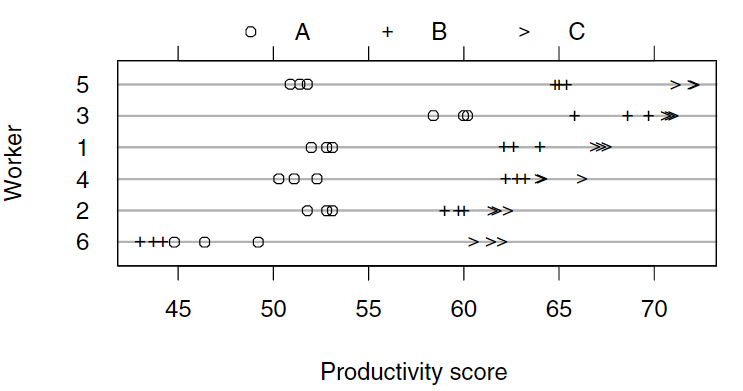

- 重复测量设置能让我们评估工人与机器之间是否存在交互效应：机器类型对不同工人产生的影响是否不同 ？
#### 交互作用的重要性？

In [1]:
library(nlme)

In [2]:
attach( Machines )

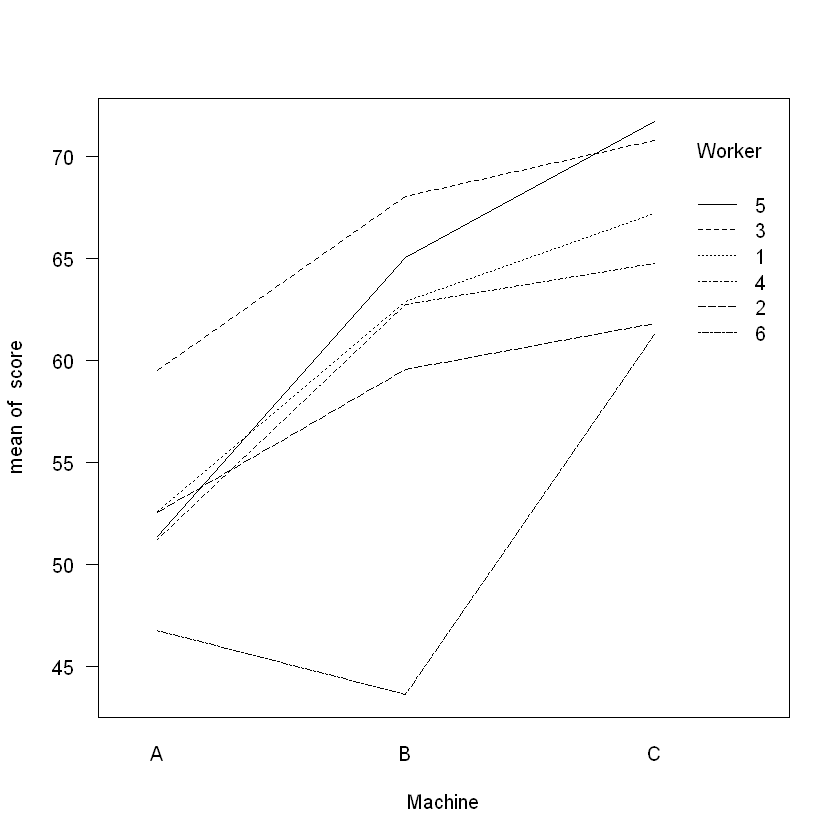

In [3]:
interaction.plot( Machine, Worker, score, las = 1)

#### 随机区组设计为什么无法估计交互项？
- 提供变异性估计，不满足统计检验要求

#### 假设无交互项的模型
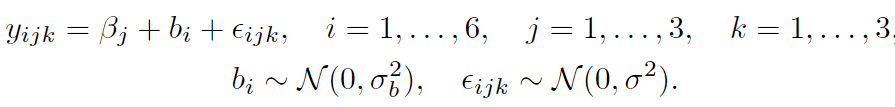

In [6]:
fm1Machine <- lme( score ~ Machine, data = Machines, random = ~ 1 | Worker )
summary(fm1Machine)

Linear mixed-effects model fit by REML
  Data: Machines 
       AIC      BIC    logLik
  296.8782 306.5373 -143.4391

Random effects:
 Formula: ~1 | Worker
        (Intercept) Residual
StdDev:    5.146552 3.161647

Fixed effects:  score ~ Machine 
               Value Std.Error DF  t-value p-value
(Intercept) 52.35556  2.229312 46 23.48507       0
MachineB     7.96667  1.053883 46  7.55935       0
MachineC    13.91667  1.053883 46 13.20514       0
 Correlation: 
         (Intr) MachnB
MachineB -0.236       
MachineC -0.236  0.500

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-2.7248806 -0.5232891  0.1327564  0.6513056  1.7559058 

Number of Observations: 54
Number of Groups: 6 

#### 假设有交互项
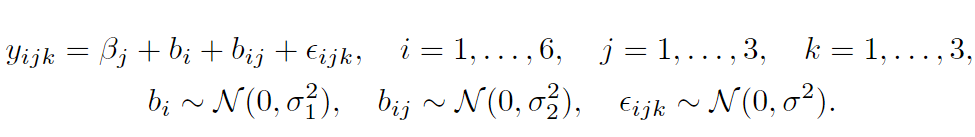

In [7]:
fm2Machine <- update( fm1Machine, random = ~ 1 | Worker/Machine )
summary(fm2Machine)

Linear mixed-effects model fit by REML
  Data: Machines 
       AIC      BIC    logLik
  227.6876 239.2785 -107.8438

Random effects:
 Formula: ~1 | Worker
        (Intercept)
StdDev:     4.78105

 Formula: ~1 | Machine %in% Worker
        (Intercept)  Residual
StdDev:    3.729532 0.9615771

Fixed effects:  score ~ Machine 
               Value Std.Error DF   t-value p-value
(Intercept) 52.35556  2.485828 36 21.061613  0.0000
MachineB     7.96667  2.176972 10  3.659518  0.0044
MachineC    13.91667  2.176972 10  6.392672  0.0001
 Correlation: 
         (Intr) MachnB
MachineB -0.438       
MachineC -0.438  0.500

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.26958675 -0.54846580 -0.01070594  0.43936568  2.54005792 

Number of Observations: 54
Number of Groups: 
             Worker Machine %in% Worker 
                  6                  18 

In [8]:
anova( fm1Machine, fm2Machine )

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
fm1Machine,"lme.formula(fixed = score ~ Machine, data = Machines, random = ~1 | Worker)",1,5,296.8782,306.5373,-143.4391,,NA,NA
fm2Machine,"lme.formula(fixed = score ~ Machine, data = Machines, random = ~1 | Worker/Machine)",2,6,227.6876,239.2785,-107.8438,1 vs 2,71.19063,3.24324e-17


#### 总结：重复测量随机区组设计 相比 随机区组设计 的优势
- 更准确
- 可讨论交互作用

#### 常见问题：数据不平衡
- lme 函数自动使用极大似然估计（maximum likelihood estimates）或者限制性极大似然估计（ristricted maximum likelihood estimates）估计缺失点

In [14]:
MachinesUnbal <- Machines[ -c(2,3,6,8,9,12,19,20,27,33), ]

In [15]:
table(MachinesUnbal$Machine, MachinesUnbal$Worker)

   
    6 2 4 1 3 5
  A 3 2 2 1 1 3
  B 3 3 3 1 2 2
  C 3 3 3 3 3 3

In [16]:
fm1MachinesU <- lme( score ~ Machine, data = MachinesUnbal, random = ~ 1 | Worker/Machine )
fm1MachinesU

Linear mixed-effects model fit by REML
  Data: MachinesUnbal 
  Log-restricted-likelihood: -90.93575
  Fixed: score ~ Machine 
(Intercept)    MachineB    MachineC 
  52.354000    7.962446   13.918222 

Random effects:
 Formula: ~1 | Worker
        (Intercept)
StdDev:    4.738731

 Formula: ~1 | Machine %in% Worker
        (Intercept)  Residual
StdDev:    3.772811 0.9332027

Number of Observations: 44
Number of Groups: 
             Worker Machine %in% Worker 
                  6                  18 

In [17]:
intervals( fm1MachinesU )

Approximate 95% confidence intervals

 Fixed effects:
                lower      est.    upper
(Intercept) 47.234474 52.354000 57.47353
MachineB     3.027774  7.962446 12.89712
MachineC     8.995455 13.918222 18.84099

 Random Effects:
  Level: Worker 
                   lower     est.    upper
sd((Intercept)) 2.216225 4.738731 10.13235
  Level: Machine 
                   lower     est.    upper
sd((Intercept)) 2.409107 3.772811 5.908455

 Within-group standard error:
    lower      est.     upper 
0.7111280 0.9332027 1.2246279 

#### 无论是平衡数据还是不平衡数据，都必须有足够的信息来参数。
- 接下来我们用上一节的数据集（不包含重复测量），加入交互作用的随机项


In [26]:
fm4Stool <- lme( effort ~ Type, ergoStool, ~ 1 | Subject/Type )
intervals( fm4Stool )

Approximate 95% confidence intervals

 Fixed effects:
                 lower      est.    upper
(Intercept)  7.3667247 8.5555556 9.744386
TypeT2       2.8183781 3.8888889 4.959400
TypeT3       1.1517114 2.2222222 3.292733
TypeT4      -0.4038442 0.6666667 1.737177

 Random Effects:
  Level: Subject 
                   lower     est.    upper
sd((Intercept)) 0.749525 1.332465 2.368784
  Level: Type 
                       lower      est.    upper
sd((Intercept)) 9.105315e-06 0.9995316 109723.1

 Within-group standard error:
       lower         est.        upper 
7.191988e-25 4.599834e-01 2.941950e+23 

In [39]:
# 原来模型
fm5Stool <- lme( effort ~ Type, ergoStool, ~ 1 | Subject )
intervals( fm5Stool )

Approximate 95% confidence intervals

 Fixed effects:
                 lower      est.    upper
(Intercept)  7.3667247 8.5555556 9.744386
TypeT2       2.8183781 3.8888889 4.959400
TypeT3       1.1517114 2.2222222 3.292733
TypeT4      -0.4038442 0.6666667 1.737177

 Random Effects:
  Level: Subject 
                    lower     est.    upper
sd((Intercept)) 0.7495103 1.332465 2.368831

 Within-group standard error:
   lower     est.    upper 
0.829353 1.100295 1.459750 

#### 可见残差相差10倍之多
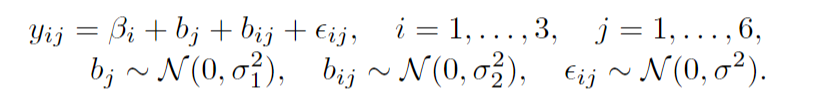

- bij 和 eij 完全混淆了

In [27]:
(fm5Stool$sigma)^2

[1] 1.210648

In [31]:
(fm4Stool$sigma)^2 + 0.9995316^2

[1] 1.210648

### fm2Machine 模型的另一种写法
- 更通用的交互项模型将每个受试对象的随机交互作用视为一个向量，并允许从所有正定矩阵的集合中估计该向量的方差 - 协方差矩阵。
fm2Machine 中潜在假设：
- 交互项方差相同、且相互独立

#### 如果想要各交互项的方差和相关阵？
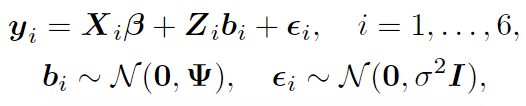
 - Ψ 是 3 × 3 矩阵

In [32]:
Machine1 <- Machines[ Machines$Worker == "1", ]
model.matrix( score ~ Machine, Machine1 )

,(Intercept),MachineB,MachineC
1,1,0,0
2,1,0,0
3,1,0,0
19,1,1,0
20,1,1,0
21,1,1,0
37,1,0,1
38,1,0,1
39,1,0,1


In [37]:
model.matrix( ~ Machine - 1, Machine1 ) 

,MachineA,MachineB,MachineC
1,1,0,0
2,1,0,0
3,1,0,0
19,0,1,0
20,0,1,0
21,0,1,0
37,0,0,1
38,0,0,1
39,0,0,1


In [34]:
fm3Machine <- update( fm1Machine, random = ~Machine - 1 |Worker)
summary( fm3Machine )

Linear mixed-effects model fit by REML
  Data: Machines 
       AIC      BIC    logLik
  228.3112 247.6295 -104.1556

Random effects:
 Formula: ~Machine - 1 | Worker
 Structure: General positive-definite, Log-Cholesky parametrization
         StdDev    Corr         
MachineA 4.0792807 MachnA MachnB
MachineB 8.6252908 0.803        
MachineC 4.3894795 0.623  0.771 
Residual 0.9615766              

Fixed effects:  score ~ Machine 
               Value Std.Error DF   t-value p-value
(Intercept) 52.35556  1.680711 46 31.150834  0.0000
MachineB     7.96667  2.420851 46  3.290854  0.0019
MachineC    13.91667  1.540100 46  9.036211  0.0000
 Correlation: 
         (Intr) MachnB
MachineB  0.463       
MachineC -0.374  0.301

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.39354008 -0.51377575  0.02690829  0.47245472  2.53338699 

Number of Observations: 54
Number of Groups: 6 

In [35]:
anova( fm1Machine, fm2Machine, fm3Machine )

,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
fm1Machine,"lme.formula(fixed = score ~ Machine, data = Machines, random = ~1 | Worker)",1,5,296.8782,306.5373,-143.4391,,NA,NA
fm2Machine,"lme.formula(fixed = score ~ Machine, data = Machines, random = ~1 | Worker/Machine)",2,6,227.6876,239.2785,-107.8438,1 vs 2,71.19063,3.24324e-17
fm3Machine,"lme.formula(fixed = score ~ Machine, data = Machines, random = ~Machine - 1 | Worker)",3,10,228.3112,247.6295,-104.1556,2 vs 3,7.37635,1.17287e-01
